Quick Statistics Exercise
===

The file `gen_data.sh` quickly generates 1,000 Cartesian (two-column x,y) data files of sinsoidal signals with an additive white Gaussian noise component. 

This ipython notebook explores how to quickly read those data files into memory and perform operations on them.

In [3]:
# Standard module imports and Jupyter magics
%matplotlib inline
import sys
sys.path.append('../common')
from plt_style import *
import glob,natsort

In [4]:
# Scientific/Numerical modules required by exercise
import numpy as np
import pylab as plt

In [17]:
# Exploring the filesystem
!ls -l dat/ | head -n 10 
!ls -l dat/ | tail -n 10
!du --si -cs dat/

total 32000
-rw-rw-r-- 1 jyalim jyalim 25250 Aug 31 12:16 seed_000.txt
-rw-rw-r-- 1 jyalim jyalim 25256 Aug 31 12:16 seed_001.txt
-rw-rw-r-- 1 jyalim jyalim 25256 Aug 31 12:16 seed_002.txt
-rw-rw-r-- 1 jyalim jyalim 25247 Aug 31 12:16 seed_003.txt
-rw-rw-r-- 1 jyalim jyalim 25252 Aug 31 12:16 seed_004.txt
-rw-rw-r-- 1 jyalim jyalim 25245 Aug 31 12:16 seed_005.txt
-rw-rw-r-- 1 jyalim jyalim 25248 Aug 31 12:16 seed_006.txt
-rw-rw-r-- 1 jyalim jyalim 25251 Aug 31 12:16 seed_007.txt
-rw-rw-r-- 1 jyalim jyalim 25248 Aug 31 12:16 seed_008.txt
ls: write error: Broken pipe
-rw-rw-r-- 1 jyalim jyalim 25252 Aug 31 12:16 seed_990.txt
-rw-rw-r-- 1 jyalim jyalim 25248 Aug 31 12:16 seed_991.txt
-rw-rw-r-- 1 jyalim jyalim 25249 Aug 31 12:16 seed_992.txt
-rw-rw-r-- 1 jyalim jyalim 25255 Aug 31 12:16 seed_993.txt
-rw-rw-r-- 1 jyalim jyalim 25249 Aug 31 12:16 seed_994.txt
-rw-rw-r-- 1 jyalim jyalim 25254 Aug 31 12:16 seed_995.txt
-rw-rw-r-- 1 jyalim jyalim 25255 Aug 31 12:16 seed_996.txt
-rw-rw-r-- 1 jy

Glob
---

One of the easiest ways to obtain paths to data files in python is to use the `glob` module which provides the `glob.glob` function. This function matches patterns in the filesystem based on standard regex, e.g. `dat/*.txt` expands to all files with extension `.txt` in the relative `dat/` directory.

Natsort
---

This very powerful module provides a sorting mechansim uncommon to the standard Linux shell: the `natsort.realsorted` function will sort strings based on real (floating) point values, e.g. 

`natsort.realsorted(['string_5e-2.txt','string_5e3.txt','string_5e0.txt'])` 

becomes: 

`['string_5e-2.txt', 'string_5e0.txt', 'string_5e3.txt']`


In [18]:
G = natsort.realsorted(glob.glob('dat/*.txt'))
print(G[:10])
print(G[-10:])

['dat/seed_000.txt', 'dat/seed_001.txt', 'dat/seed_002.txt', 'dat/seed_003.txt', 'dat/seed_004.txt', 'dat/seed_005.txt', 'dat/seed_006.txt', 'dat/seed_007.txt', 'dat/seed_008.txt', 'dat/seed_009.txt']
['dat/seed_990.txt', 'dat/seed_991.txt', 'dat/seed_992.txt', 'dat/seed_993.txt', 'dat/seed_994.txt', 'dat/seed_995.txt', 'dat/seed_996.txt', 'dat/seed_997.txt', 'dat/seed_998.txt', 'dat/seed_999.txt']


Investigating the Data
---

Here we'll plot a single noisy signal, to get a good visual sample of what the data look like.

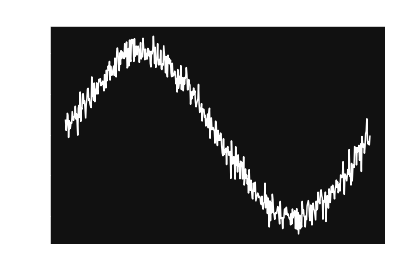

In [54]:
x,y = np.loadtxt(G[0]).T
plt.figure()
plt.plot(x,y,'w-')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Seed 0 is indeed a noisy signal',fontsize=18);

Recovering the Mean signal
---

Here two methods are presented for recovering the mean signal. 

The first method, slightly slower, uses an explicit loop. 

The second method uses a list comprehension.

Why is one method faster than the other? 

Because the explicit loop uses more high-level (and slow) python interpretation between executions of very fast C code.

In [57]:
%%time
# Note that the zeroth file is already read
D = y
for k,g in enumerate(G):
    if k > 0:
        x,y = np.loadtxt(g).T
        D += y
M = D / k

CPU times: user 7.12 s, sys: 231 ms, total: 7.35 s
Wall time: 8.42 s


In [58]:
%%time
D = np.array([ np.loadtxt(g).T[1] for g in G ])
M = np.mean(D,axis=0)

CPU times: user 5.68 s, sys: 129 ms, total: 5.81 s
Wall time: 6.11 s


### Mean signal

Now that the mean signal is recovered in memory, we can visualize:

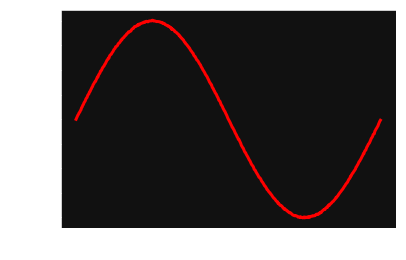

In [52]:
plt.plot(x,M,'r-',lw=3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

Signal Perturbation
---

What about the accumulated noise?

Note that `D` and `M` have different shapes, yet python's numpy is smart enough to figure it out

In [60]:
print(D.shape)
print(M.shape)

(1000, 500)
(500,)


In [79]:
%%time
# Slow explicit method

# initialize object
dZ = 0*D
for k,d in enumerate(D):
    dZ[k] = d - M

CPU times: user 1.07 s, sys: 459 µs, total: 1.07 s
Wall time: 49.9 ms


In [80]:
%%time
# Fast list comprehension way from previous example
dY = np.array([d - M for d in D])

CPU times: user 8.87 ms, sys: 6.1 ms, total: 15 ms
Wall time: 12.9 ms


In [81]:
%%time
# Significantly faster method
dX = D - M

CPU times: user 2.92 ms, sys: 53 µs, total: 2.97 ms
Wall time: 1.67 ms


In [82]:
# Verification
print(abs(dX-dZ).max())
print(abs(dX-dY).max())


0.0
0.0


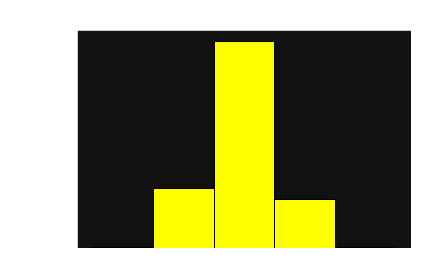

In [84]:
# Visualization
plt.hist(dX.flatten(),bins=5,edgecolor='k',facecolor='#ffff00')
plt.title('Perturbation Histogram',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);